<a href="https://colab.research.google.com/github/Vastra-Gotalandsregionen/AI_utbildning/blob/main/dag1/02_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning med tio rader kod
Att lära en maskin genom exempel och erfarenheter, istället för att manuellt mata in regler. Detta genom supervised machine learning.
Maskinen ska förutspå om en ny frukt är en apelsin eller äpple baserat på tidigare erfarenheter.

## 1. Samla in träningsdata
Det som avslöjar denna machine learning som just en *supervised* machine learning är för att vi har labels. Labels är de etiketter med beskrivande svar vi matar maskinen med.

*Obs! De kantiga parenteserna får du till genom knappen Alt Gr och siffrorna 8 eller 9 på Windows. På Mac heter Alt Gr istället Option.*

In [5]:
from sklearn import tree
# traningsdata: vikt i gram, ytans beskaffenhet (0 för len, 1 för gropig)
# traningsdata = [[140, "len"], [130, "len"], [150, "gropig"], [170, "gropig"]]
traningsdata = [[140, 0], [130, 0], [150, 1], [170, 1]]

# etiketter = ["äpple", "äpple", "apelsin", "apelsin"]
# etiketter = 0 för äpple, 1 för apelsin
etiketter = [0, 0, 1, 1]

## 2. Träna upp klassificeraren och leta mönster i data
Vi kör med ett beslutsträd (decision tree)

In [6]:
klass = tree.DecisionTreeClassifier()
klass = klass.fit(traningsdata, etiketter)

## 3. Predicera
Förutsäg vilken sorts frukt något är baserat på dess egenskaper

In [17]:
ny_frukt = [[180, 0]] # ny frukt, 180 gram och gropig yta

if 1 in klass.predict(ny_frukt):
    print("Apelsin")
else:
    print("Äpple")

Äpple


Grattis! Nu har du prövat på övervakad maskininlärning, en av AI-teknikerna.

----
## Överkurs
Nedan kan man gå igenom vid frågor eller om tid finnes
### Hur ser beslutsträdet ut?
Med nedan kod kan man få information om beslutsträdets struktur. Alltså se vilka värden som sorteras till respektive prediktion.

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

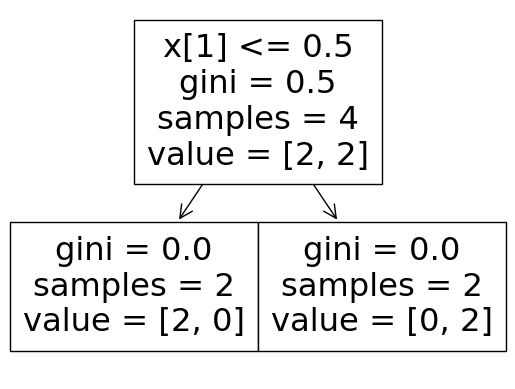

In [8]:
tree.plot_tree(klass)

### Illustration Iris

In [9]:
# Importera paket och dataset
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd 
import numpy as np

# Ladda datset i från paketet
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
# Dela upp datasetet
data = iris_df.drop('target', axis=1)
target = iris_df['target']
model = tree.DecisionTreeClassifier()
model = model.fit(data, target)

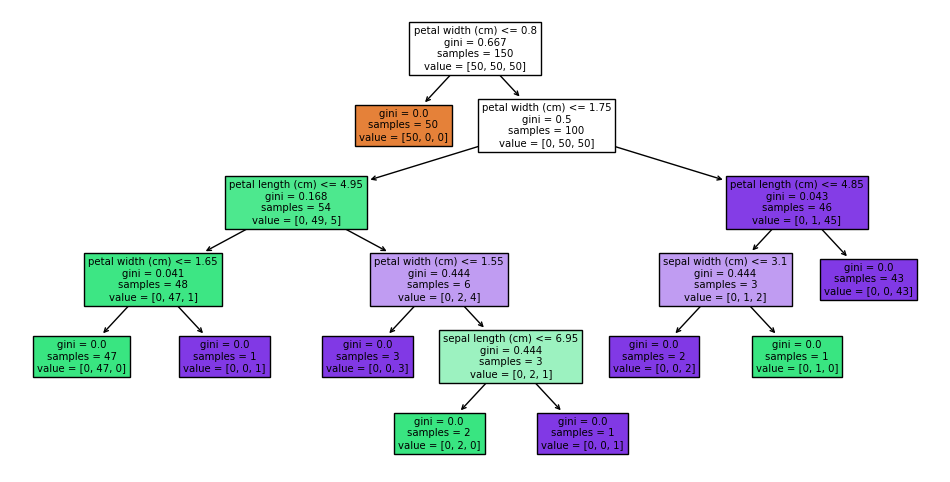

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6)) 

tree.plot_tree(model, filled = True, feature_names = iris_df.columns[:-1]);